In [1]:
# source :  Deep_Learning_with_Python (page 200)

In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

In [5]:
# Listing 6.22 Preparing the IMDB data

In [3]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')


Loading data...
17464789/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences


In [4]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [6]:
# Listing 6.23 Training the model with Embedding and SimpleRNN layers

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

In [8]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 30s 172ms/step - loss: 0.6216 - acc: 0.6380 - val_loss: 0.6188 - val_acc: 0.6714
Epoch 2/10
157/157 [==============================] - 27s 174ms/step - loss: 0.4010 - acc: 0.8281 - val_loss: 0.4591 - val_acc: 0.7824
Epoch 3/10
157/157 [==============================] - 28s 179ms/step - loss: 0.3115 - acc: 0.8737 - val_loss: 0.4507 - val_acc: 0.7804
Epoch 4/10
157/157 [==============================] - 44s 284ms/step - loss: 0.2510 - acc: 0.9043 - val_loss: 0.3524 - val_acc: 0.8520
Epoch 5/10
157/157 [==============================] - 28s 177ms/step - loss: 0.2060 - acc: 0.9219 - val_loss: 0.3856 - val_acc: 0.8370
Epoch 6/10
157/157 [==============================] - 31s 198ms/step - loss: 0.1627 - acc: 0.9451 - val_loss: 0.4448 - val_acc: 0.8116
Epoch 7/10
157/157 [==============================] - 27s 175ms/step - loss: 0.1070 - acc: 0.9641 - val_loss: 0.4652 - val_acc: 0.8334
Epoch 8/10
157/157 [==============================] - 3

In [10]:
# Listing 6.24 Plotting results

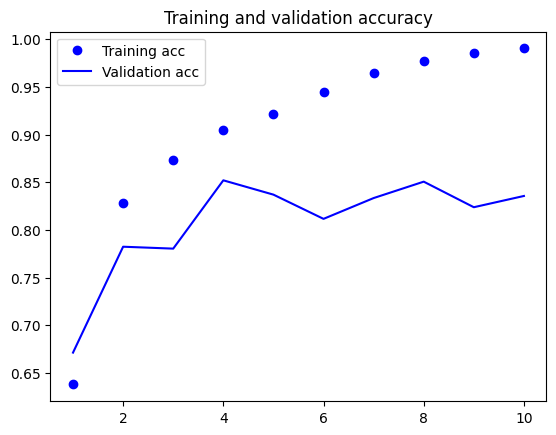

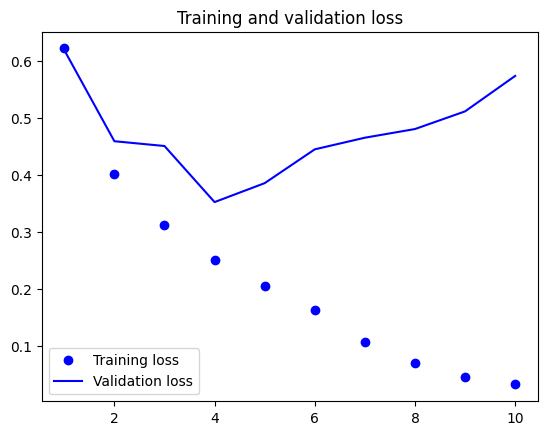

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
